In [2]:
import pandas as pd


In [3]:
# XGBoost #

# En este caso tambien utilizamos validacion cruzada.

# Lo primero es borrar todo lo existente para evitar problemas.


# En este caso tambien utilizamos validacion cruzada.


# A continuacion volvemos a cargar los datos.

data = pd.read_csv("hormigon.csv")

# Separamos la variable dependiente ("y") de las explicativas ("X").

y=data['strength']
X = data.drop(['strength'], axis = 1)




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [09:59:06] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [09:59:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [09:59:06] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [09:59:06] WARNING: /

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

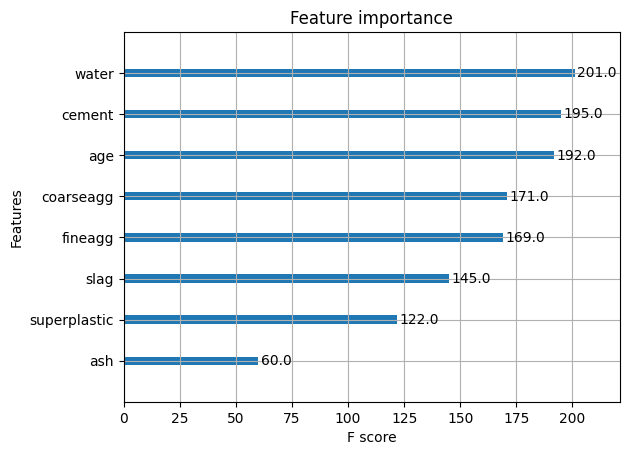

In [4]:
# Transformamos los datos en una matriz "xgb" para poder realizar el modelo.

# Para instalar el xgboost:
# Abrir Anaconda Prompt
# Escribir: anaconda search -t conda xgboost
# Escribir: conda install -c mndrake xgboost

# Si la opcion anterior no funciona correctamente, existe la siguiente opcion:
# conda install -c anaconda py-xgboost
# Es normal que tarde un buen rato.

import xgboost as xgb
from sklearn.model_selection import cross_val_score

datos = xgb.DMatrix(X, label=y)

xgb_model = xgb.XGBRegressor(base_score=1, colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3, min_child_weight=1, missing=1, n_estimators=200, objective='reg:linear', reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True, subsample=1)
xgb_model

modeloxgb = xgb_model.fit(X,y)
modeloxgb

xgb_model.score(X,y)

scores = cross_val_score(xgb_model, X, y, cv=5)
scores
scores.mean()


from xgboost import plot_importance


#importancias=pd.DataFrame(modeloxgb.feature_importances_)
#importancias.index=(X.columns)


#import pandas as pd
#importacia=pd.concat(X.columns,importancias)

plot_importance(modeloxgb)